<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool07_DeepLearning/blob/main/DL05_Keras(%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 영화 리뷰 분류 : 이진분류예제

>## 1) 데이터 준비
- 신경망에 숫자 리스트를 바로 주입할 수 없음 : 텐서변환
- 원핫인코딩 사용 : 10000차원 벡터로 변환
- IMDB : Internet Mobie Data Base

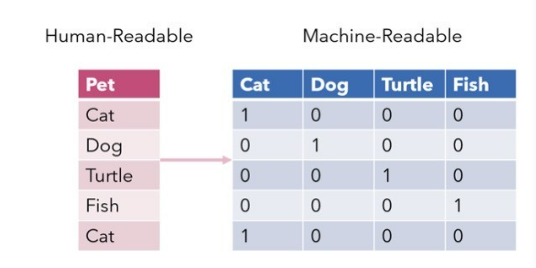

>>### (1) 데이터셋

In [76]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)   #출현빈도 높은 단어 1만개만 가져오겠다 

- 데이터 모양 확인

In [77]:
train_data.shape

(25000,)

- 데이터 라벨 정하기

In [78]:
train_labels[0:5]

array([1, 0, 0, 1, 0])

- 데이터 갯수 파악

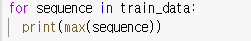

- for문 반복중에 최댓값 -> 리뷰의 최댓값 뽑기

In [79]:
max([max(sequence) for sequence in train_data])

9999

- 데이터 준비

In [80]:
#적당한 크기의 배열 만들기
#적당한 배열 : 

import numpy as np

def vectorize_sequences(sequences, dimension=10000):

  #크기가 (len(sequences), dimension) 이고 원소가 0인 행렬 만들기
  result = np.zeros((len(sequences),dimension))

  print(result.shape)

  for i, sequence in enumerate(sequences):  #열거형으로 변경 / (a) 붙이면 열거가능한 형태로 변경해줌

    #result[i]에서 특정 인덱스의 위치를 1로 만듦
    result[i, sequence] = 1
    return result

In [81]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [82]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

- 라벨데이터를 실수형으로

In [83]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [84]:
y_train[0]

1.0

>## 2) 신경망 제작

In [85]:
from keras import models
from keras import layers

#모델설정
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #이진분류기 때문에, 최종 출력은 1개만 있으면 됨  

#옵티마이저
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [87]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  #학습과 별개로 검증까지 이뤄짐 

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 2s 59ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 8/20
30

>## 3) 데이터 시각화

In [88]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

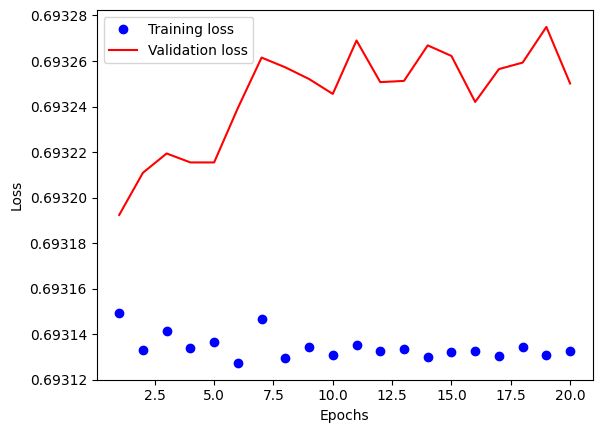

In [91]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

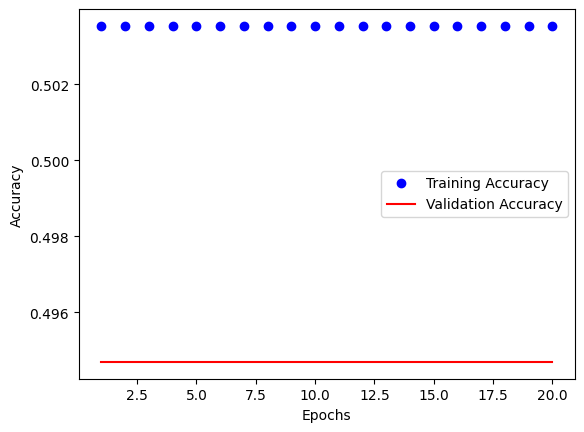

In [92]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

>## 4) 최적모델 찾기

In [93]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.51582897],
       [0.49644592],
       [0.49644592],
       ...,
       [0.49644592],
       [0.49644592],
       [0.49644592]], dtype=float32)

In [94]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 3s 4ms/step - loss: 0.6932 - accuracy: 0.5000
loss=0.6931736469268799, accuracy=0.4999600052833557
